### 사용 라이브러리

In [1]:
import pandas as pd
import numpy as np

# 그래프 관련 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib.pyplot import style

from libs.lib import get_file_dir

# 스타일 설정
style.use('seaborn')

# 한글 폰트 설정
if (platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 음수(-)가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False 

## 시도별 1인당 지역내총생산, 지역총소득, 개인소득(01-20)

### 1.0 데이터 불러오기

In [2]:
df = pd.read_csv(get_file_dir('data','시도별_1인당_지역내총생산__지역총소득__개인소득_20220406163912.csv'), encoding='cp949')

### 2.0 데이터 탐색 및 전처리

데이터 요약정보 확인하기

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     72 non-null     object 
 1   소득      72 non-null     object 
 2   2001    68 non-null     float64
 3   2002    68 non-null     float64
 4   2003    68 non-null     float64
 5   2004    68 non-null     float64
 6   2005    68 non-null     float64
 7   2006    68 non-null     float64
 8   2007    68 non-null     float64
 9   2008    68 non-null     float64
 10  2009    68 non-null     float64
 11  2010    68 non-null     float64
 12  2011    68 non-null     float64
 13  2012    68 non-null     float64
 14  2013    72 non-null     int64  
 15  2014    72 non-null     int64  
 16  2015    72 non-null     int64  
 17  2016    72 non-null     int64  
 18  2017    72 non-null     int64  
 19  2018    72 non-null     int64  
 20  2019    72 non-null     int64  
 21  2020    72 non-null     int64  
dtypes: f

In [4]:
# 행/열 보여주기
df.shape

(72, 22)

데이터 결측값 확인

In [5]:
# 누락값 확인
df.isnull().sum()

시도별     0
소득      0
2001    4
2002    4
2003    4
2004    4
2005    4
2006    4
2007    4
2008    4
2009    4
2010    4
2011    4
2012    4
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
dtype: int64

In [6]:
df[df['2001'].isna()].index
df[df['2002'].isna()].index
df[df['2003'].isna()].index
df[df['2004'].isna()].index
df[df['2005'].isna()].index
df[df['2006'].isna()].index
df[df['2007'].isna()].index
df[df['2008'].isna()].index
df[df['2009'].isna()].index
df[df['2010'].isna()].index
df[df['2011'].isna()].index
df[df['2012'].isna()].index

##Int64Index([32, 33, 34, 35], dtype='int64')

Int64Index([32, 33, 34, 35], dtype='int64')

In [8]:
# 32-35번 행 2001~2012 누락값을 평균값으로 대체
##32: 44864
##33: 40969.25
##34: 20970.875
##35:17347.875

df2 = pd.read_csv(get_file_dir('refined','income.csv'), encoding='cp949')

# 컬럼별 누락값 개수
df2.shape[0] - df2.count()

시도별     0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
dtype: int64

In [9]:
# 중복값 확인
df2.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
67    False
68    False
69    False
70    False
71    False
Length: 72, dtype: bool

기초 통계정보 확인하기

In [10]:
df2.describe()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,12554.597222,13563.194444,14221.138889,15185.972222,15793.208333,16512.458333,17522.263889,18414.583333,18985.416667,20391.833333,21311.875000,21939.986111,22685.652778,23708.500000,24561.625000,25298.611111,26252.000000,26783.166667,27399.847222,27385.125000
std,6826.836664,6985.393742,7057.151792,7594.215476,7565.082795,7645.057310,8120.264798,8423.070257,8392.414116,9476.476098,9964.578163,9929.301701,10329.431277,10823.803228,10412.823636,10588.756537,10890.697215,10724.226344,10732.431183,10592.876252
min,7551.000000,8145.000000,8287.000000,8427.000000,8881.000000,9364.000000,10043.000000,10490.000000,10786.000000,11580.000000,12235.000000,12789.000000,13119.000000,13447.000000,13995.000000,14403.000000,14957.000000,15583.000000,15885.000000,15150.000000
25%,8260.250000,9010.250000,9310.750000,9836.250000,10436.500000,11054.000000,11415.750000,12098.250000,12655.000000,13258.500000,13821.750000,14358.000000,14876.250000,15479.750000,16476.000000,16870.000000,17365.000000,18174.000000,18798.250000,19604.000000
50%,10996.000000,11898.500000,12681.500000,13472.500000,14245.500000,15083.000000,16000.500000,16675.500000,17189.000000,18066.500000,18843.500000,19370.000000,19653.500000,21043.000000,21652.500000,21512.000000,22273.500000,23237.000000,23930.500000,24009.500000
75%,14100.750000,15440.750000,16594.500000,17614.000000,18375.500000,19463.500000,20968.500000,21252.250000,22032.500000,24041.500000,25009.000000,26085.500000,26714.250000,28642.750000,29829.250000,30979.250000,32160.500000,33162.750000,34252.250000,33962.500000
max,44864.000000,44864.000000,44864.000000,44864.000000,44864.000000,44864.000000,46310.000000,48794.000000,46624.000000,55585.000000,61755.000000,62242.000000,62653.000000,62944.000000,62605.000000,64021.000000,65370.000000,63793.000000,65112.000000,60201.000000


In [11]:
df2.count()

시도별     72
2001    72
2002    72
2003    72
2004    72
2005    72
2006    72
2007    72
2008    72
2009    72
2010    72
2011    72
2012    72
2013    72
2014    72
2015    72
2016    72
2017    72
2018    72
2019    72
2020    72
dtype: int64

<AxesSubplot:>

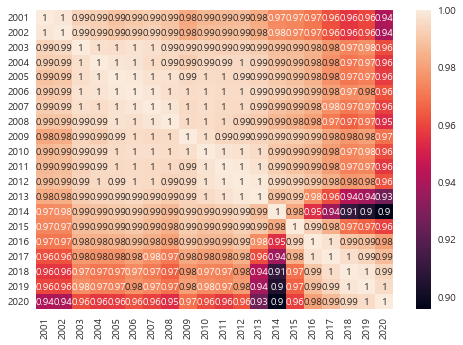

In [12]:
df2.corr()

sns.heatmap(df.corr(), annot=True)

데이터 분석

1. 연도별로 최대값 구해서 시각화
2. 연도별로 최소값 구해서 시각화
3. 연도별로 평균값 구해서 시각화
4. 연도별로 다 묶어서 그 중에서 최대,최소값 갖는 시도 찾기
5. 1인당지역내총생산, 1인당지역총소득, 1인당 민간소비로 다시 나눠서 연도별 최대,최소 찾아서 시각화
6. 전년대비 증감률 시각화
7. income별 상위 5개 시도 구하기
8. income별 하위 5개 시도 구하기

In [13]:
df2['income']=df2['시도별'].map(lambda x:' '.join(x.split()[1:]))
df2['시도']=df2['시도별'].map(lambda x:' '.join(x.split()[:1]))
df2

,시도별,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,income,시도
0,전국 1인당 지역내총생산,15009,16505,17609,19027,19902,20878,22456,23637,24493,...,29849,30861,32556,34042,35831,36866,37274,37389,1인당 지역내총생산,전국
1,전국 1인당 지역총소득,14908,16444,17548,18995,19762,20817,22399,23643,24455,...,30038,31010,32658,34167,35977,37014,37596,37677,1인당 지역총소득,전국
2,전국 1인당 개인소득,9120,9820,10389,11063,11551,12058,12636,13425,13811,...,16432,17006,18063,18520,19204,19910,20661,21205,1인당 개인소득,전국
3,전국 1인당 민간소비,8310,9263,9500,9813,10443,11074,11780,12365,12657,...,15004,15357,15772,16276,16996,17624,18057,17297,1인당 민간소비,전국
4,서울특별시 1인당 지역내총생산,17698,19847,21134,21826,23151,24420,26478,27894,28967,...,34105,35113,37236,39356,41374,43664,45118,45859,1인당 지역내총생산,서울특별시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,경상남도 1인당 민간소비,7704,8565,8671,8913,9525,10112,10699,11343,11556,...,14022,14384,14768,15180,15687,16068,16520,15782,1인당 민간소비,경상남도
68,제주특별자치도 1인당 지역내총생산,11546,12886,13839,15098,15599,16001,17139,17655,19421,...,24491,25968,28280,30284,31470,30721,30792,29144,1인당 지역내총생산,제주특별자치도
69,제주특별자치도 1인당 지역총소득,12163,12969,13580,14859,14762,15659,16350,17358,18437,...,24020,25400,27314,29342,30863,31193,30710,30066,1인당 지역총소득,제주특별자치도
70,제주특별자치도 1인당 개인소득,8729,9314,9679,10082,10552,11125,11544,12411,12809,...,14829,15329,16685,17366,17816,18456,18815,19921,1인당 개인소득,제주특별자치도


In [14]:
df2[['2001','시도별']].groupby(by='시도별').max().reset_index()


,시도별,2001
0,강원도 1인당 개인소득,7850
1,강원도 1인당 민간소비,7799
2,강원도 1인당 지역내총생산,12437
3,강원도 1인당 지역총소득,11725
4,경기도 1인당 개인소득,9422
...,...,...
67,충청남도 1인당 지역총소득,14139
68,충청북도 1인당 개인소득,8192
69,충청북도 1인당 민간소비,7613
70,충청북도 1인당 지역내총생산,14391


In [20]:
df3 = df2.drop(labels=['시도별'],axis=1)
df3.head(2)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,income,시도
0,15009,16505,17609,19027,19902,20878,22456,23637,24493,26788,...,29849,30861,32556,34042,35831,36866,37274,37389,1인당 지역내총생산,전국
1,14908,16444,17548,18995,19762,20817,22399,23643,24455,26828,...,30038,31010,32658,34167,35977,37014,37596,37677,1인당 지역총소득,전국


In [25]:
df4 = df3.copy()
df4.loc[:,'income'] = df4['income'].map(lambda x:x.split()[1])
df4 = df4.melt(id_vars=['income','시도'],var_name='연도',value_name='소득')
df4.columns = ['분류','시도','연도','소득']

df4

,분류,시도,연도,소득
0,지역내총생산,전국,2001,15009
1,지역총소득,전국,2001,14908
2,개인소득,전국,2001,9120
3,민간소비,전국,2001,8310
4,지역내총생산,서울특별시,2001,17698
...,...,...,...,...
1435,민간소비,경상남도,2020,15782
1436,지역내총생산,제주특별자치도,2020,29144
1437,지역총소득,제주특별자치도,2020,30066
1438,개인소득,제주특별자치도,2020,19921


In [27]:
df4.to_csv(get_file_dir('refined','income_refined.csv'),index=False)